# Projeto - Perceptron e MLP

## 

Para resolver o primeiro mini projeto, o aluno ou o grupo de alunos (grupo de no máximo 4 pessoas) devem escolher um `dataset` a escolha de vocês ou um dos `datasets` indicados no _Drive_ da turma para realizar o projeto. A partir do `dataset` escolhido, desenvolva os itens abaixo:

__A)__ (10 pontos) Desenvolva uma análise exploratória dos dados adequada;

__B)__ (5 pontos) Faça a preparação dos dados para treinar os modelos;

__C)__ (15 pontos) Teste pelo menos 3 modelos de _Machine Learning_ convencional, sendo algumas sugestões como Regressão Logística, Árvore de Decisão, _Random Forest_ entre outros;

__D)__ (30 pontos) Desenvolva uma rede neural _Perceptron_ para fazer a separação entre as classes. O modelo consegue fazer a separação linear dos dados? Avaliar utilizando o PCA caso necessário;

__E)__ (30 pontos) Monte duas redes neurais MLP utilizando combinações de camadas diferentes (teste algumas combinações para chegar em uma melhor performance dos resultados).

__F)__ (10 pontos) Qual dos modelos teve a melhor performance entre os modelos convencionais, _Perceptron_ e MLP? Discuta um pouco a respeito.

<br>

__Entrega:__ até o dia 02/10 pelo Class (vou criar uma atividade como projeto para que vocês entreguem por lá)

__Monitoria:__ dia 20/09 e 27/09;

## 

In [21]:
def eda_base():
    # importando bibliotecas básicas para exploração
    import pandas as pd
    import numpy as np
    import matplotlib.pyplot as plt
    import seaborn as sns
    from warnings import simplefilter

    simplefilter(action='ignore', category=FutureWarning)

    caminho = input('Digite o caminho do arquivo(Sem aspas):  ')
    #Inicando os processos de leitura e apresentação da base de dados
    
    base = pd.read_csv(caminho, sep=';')
    # Apresentação de dados e sua principais visualizações
    display(base)
    print('='* 100)
    display(base.info())
    print('='* 100)
    display(base.isnull().sum())
    print('='* 100)
    display(base.describe())
    
    #Fazendo plot de todas as classes para vizualizar distribuição de dados
    for col in base:

        sns.histplot(data=base, x=col, kde=True).set_title(f"Distribuição da variável de {col}")
        plt.show()
    
    plt.figure(figsize=(12, 6))

    sns.heatmap(base.corr(), annot=True);

    # Estudando os dados com base em uma coluna

    display(base.corr()[col].sort_values())

    col = input('Defina a coluna: ')

    for column in base.drop(columns=col):
    
        sns.jointplot(data=base, x=column, y=col);

    for column in base.drop(columns=col):
    
        sns.barplot(data=base, x=col, y=column, ci=90)
        plt.show()
    
    sns.pairplot(base)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


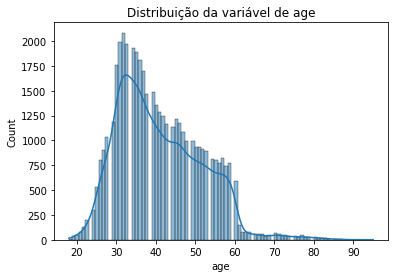

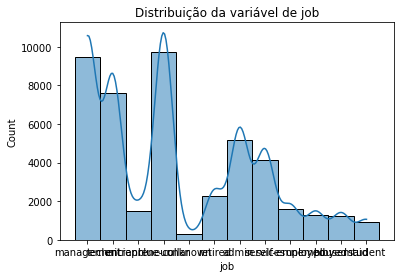

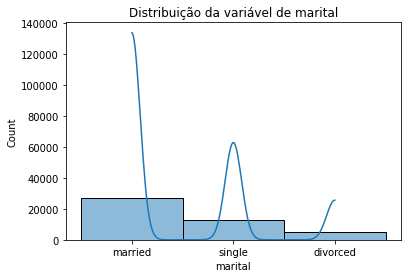

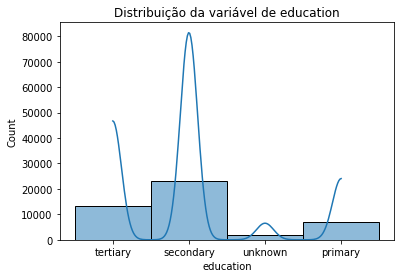

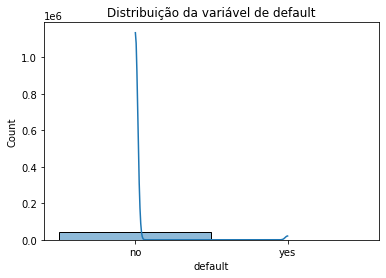

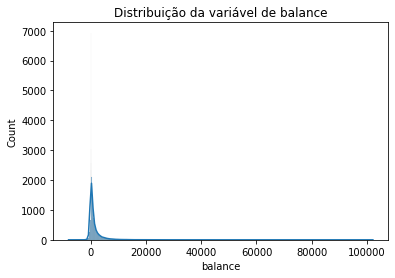

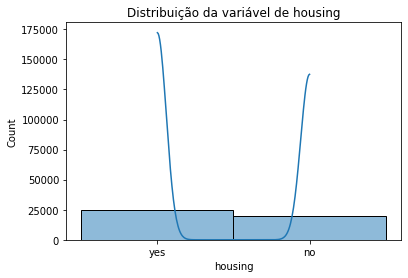

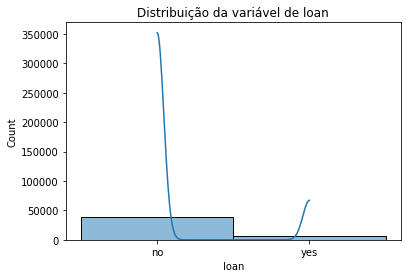

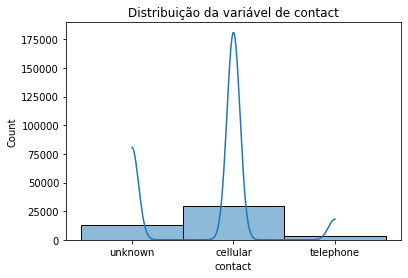

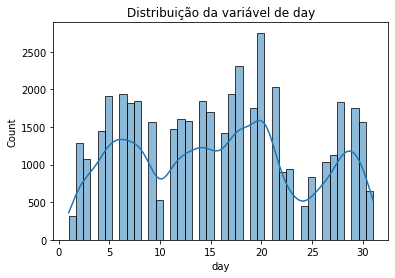

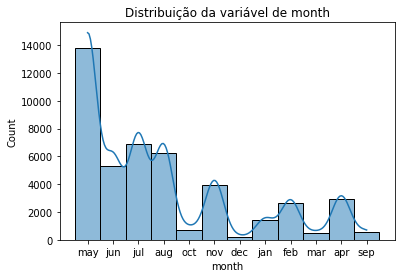

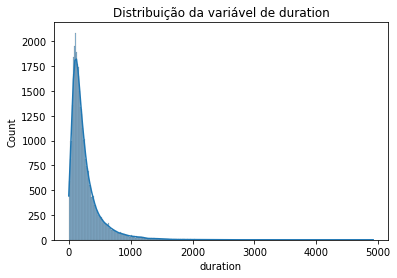

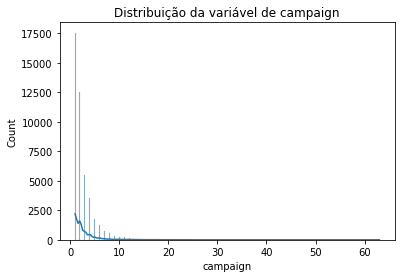

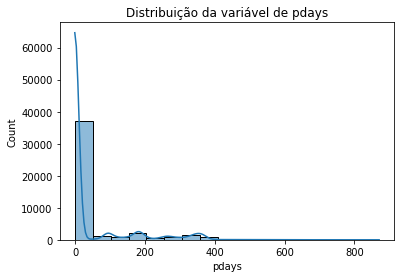

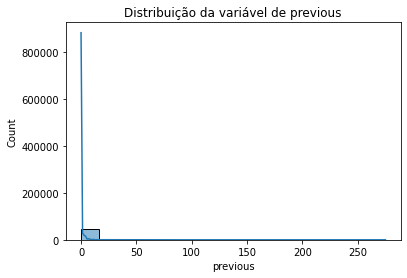

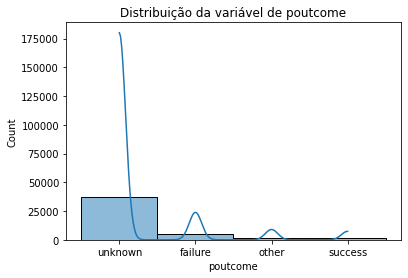

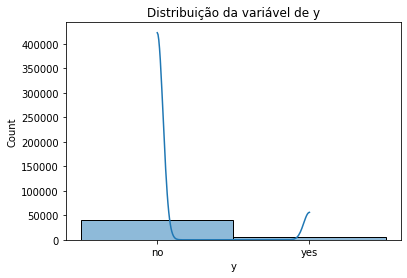

KeyError: 'y'

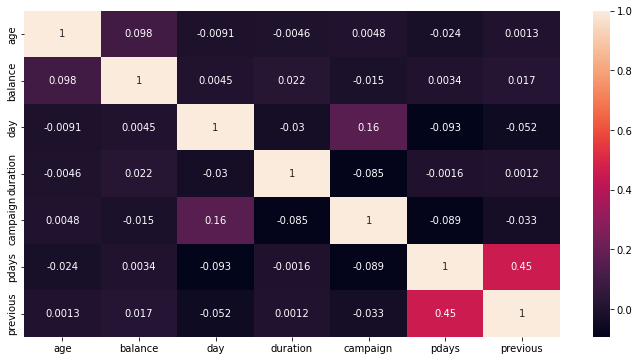

In [22]:
eda_base()